In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Test image 

In [3]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


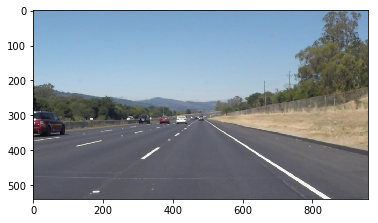

In [4]:
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image) 

In [30]:
import math

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
          
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):

    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):

    return cv2.addWeighted(initial_img, α, img, β, λ)

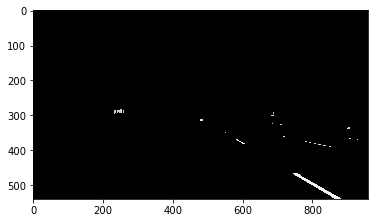

In [28]:
import os
dest="test_images/"
image_list=os.listdir(dest)
for file in image_list:
    image_location=dest + file
    image = mpimg.imread(image_location)    
    ysize = image.shape[0]
    xsize = image.shape[1]
    color_select = np.copy(image)
    line_image = np.copy(image)
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 200
    rgb_threshold = [red_threshold, green_threshold, blue_threshold]
    thresholds = (image[:,:,0]  <rgb_threshold[0]) \
                | (image[:,:,1] < rgb_threshold[1]) \
                | (image[:,:,2] <rgb_threshold[2])
    
    color_select[thresholds] = [0,0,0] 
    plt.imshow(color_select)

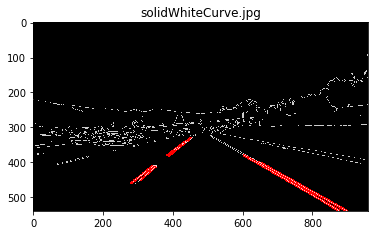

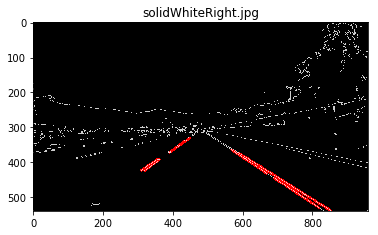

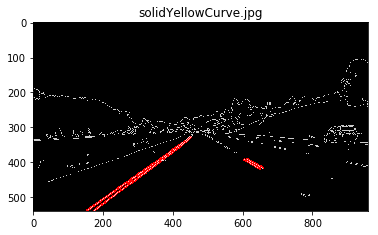

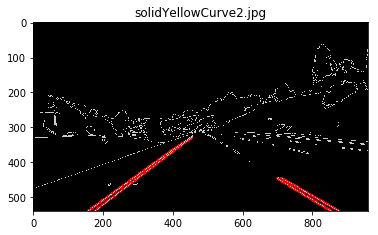

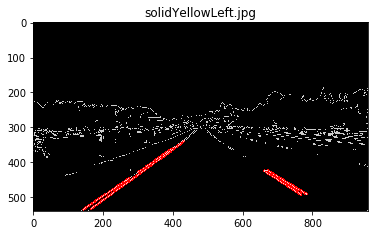

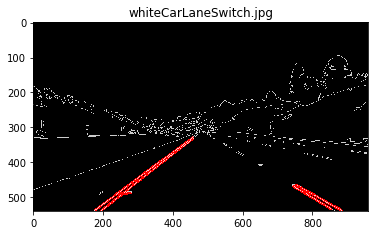

In [31]:
import os
dest="test_images/"
image_list=os.listdir(dest)
for file in image_list:
    plt.figure()
    image_location=dest + file
    image = mpimg.imread(image_location)
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    kernel_size = 3
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
    low_threshold = 50
    high_threshold = 150
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    plt.imshow(edges, cmap='Greys_r')
    mask = np.zeros_like(edges)   
    ignore_mask_color = 255   
    imshape = image.shape
    vertices = np.array([[(100,imshape[0]),(450, 330), (490, 330), (imshape[1],imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(edges, mask)
    rho = 2 
    theta = np.pi/180 
    threshold = 15  
    min_line_length = 40 
    max_line_gap = 20   
    line_image = np.copy(image)*0 
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
    draw_lines(line_image, lines)
    color_edges = np.dstack((edges, edges, edges)) 
    lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
    plt.title(file) 
    plt.imshow(lines_edges)


## Test videos

### White

In [10]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [11]:
def process_image(image):
        gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        kernel_size = 3
        blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
        low_threshold = 50
        high_threshold = 150
        edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
        mask = np.zeros_like(edges)   
        ignore_mask_color = 255   
        imshape = image.shape
        vertices = np.array([[(100,imshape[0]),(450, 330), (490, 330), (imshape[1],imshape[0])]], dtype=np.int32)
        cv2.fillPoly(mask, vertices, ignore_mask_color)
        masked_edges = cv2.bitwise_and(edges, mask)
        rho = 2 
        theta = np.pi/180 
        threshold = 15  
        min_line_length = 40 
        max_line_gap = 20   
        line_image = np.copy(image)*0 
        lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
        draw_lines(line_image, lines)
        image=cv2.addWeighted(image, 0.8, line_image, 1, 0)
        return image

In [12]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4


100%|█████████▉| 221/222 [00:05<00:00, 39.75it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: white.mp4 

CPU times: user 2.42 s, sys: 516 ms, total: 2.94 s
Wall time: 6.27 s


In [13]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

### Yellow

[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4


100%|█████████▉| 681/682 [02:29<00:00,  3.96it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 2min 14s, sys: 9.44 s, total: 2min 24s
Wall time: 2min 30s


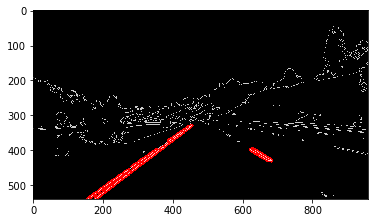

In [10]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))